In [1]:
import fundamentalanalysis as fa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime


%matplotlib inline  

In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
# api_key = '00ef9804fcde0edd93b1b4821ee2f06a'
api_key = 'c81352430e2fe3c941faf0814227562b'

In [4]:

''' Колонки '''
ticker = 'AAPL'
# ticker = 'AAPL'


''' время '''
stime='1999-01-01'
ftime='2023-02-01'
period = '1mo'  # '1d' '1wk'

In [5]:
def get_data_from_ticker(tick, stime, ftime, interval=period):
    ticker = yf.Ticker(tick)

    df = ticker.history(start=stime, end=ftime, interval=interval)
    x = pd.DataFrame(df)
    x.rename(columns={"Close": tick}, inplace=True)
    z = x.drop(columns=["Open", "High", "Low", "Volume", "Dividends", "Stock Splits"])
    return z

df = get_data_from_ticker(ticker, stime, None, period)
df.tail(3)

,AAPL
Date,
2022-11-01 00:00:00-04:00,147.784851
2022-12-01 00:00:00-05:00,129.929993
2023-01-01 00:00:00-05:00,135.750000


change index

In [6]:
def change_index(df):
    df_index = df.index.to_list()
    for i in range(len(df_index)):
        t = df_index[i].date()
        df_index[i] = t.strftime('%Y-%m-%d')
    df['Date_index'] = df_index
    df = df.set_index('Date_index')
    return df

df = change_index(df)
df.head(3)

,AAPL
Date_index,
1999-01-01,0.313473
1999-02-01,0.264954
1999-03-01,0.273516


In [7]:
# df.loc['1999-01-01']

In [8]:
# df_st_gr = fa.financial_statement_growth(ticker, api_key, period='annual') #quarter 

In [9]:
# df_st_gr

In [10]:
key_metrics = fa.key_metrics(ticker, api_key, period='annual')
df_key_metr = key_metrics.T
df_key_metr.head(3)

,period,revenuePerShare,netIncomePerShare,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,bookValuePerShare,tangibleBookValuePerShare,shareholdersEquityPerShare,interestDebtPerShare,marketCap,enterpriseValue,peRatio,priceToSalesRatio,pocfratio,pfcfRatio,pbRatio,ptbRatio,evToSales,enterpriseValueOverEBITDA,evToOperatingCashFlow,evToFreeCashFlow,earningsYield,freeCashFlowYield,debtToEquity,debtToAssets,netDebtToEBITDA,currentRatio,interestCoverage,incomeQuality,dividendYield,payoutRatio,salesGeneralAndAdministrativeToRevenue,researchAndDdevelopementToRevenue,intangiblesToTotalAssets,capexToOperatingCashFlow,capexToRevenue,capexToDepreciation,stockBasedCompensationToRevenue,grahamNumber,roic,returnOnTangibleAssets,grahamNetNet,workingCapital,tangibleAssetValue,netCurrentAssetValue,investedCapital,averageReceivables,averagePayables,averageInventory,daysSalesOutstanding,daysPayablesOutstanding,daysOfInventoryOnHand,receivablesTurnover,payablesTurnover,inventoryTurnover,roe,capexPerShare
2022,FY,24.317273,6.154614,7.532763,6.872426,2.978793,3.124822,3.124822,3.124822,7.585118,2423475620080.514648,2519898620080.514648,24.282593,6.145837,19.839998,21.746324,47.826721,47.826721,6.390362,18.926968,20.629374,22.611547,0.041182,0.045985,1.952933,0.856354,0.724234,0.879356,40.749574,1.223921,0.006124,0.148703,0,0.066571,0,-0.087662,-0.027155,-0.964337,0.02292,20.801964,0.600871,0.282924,-12.679296,-18577000000,None,-166678000000,2.369533,56219000000,59439000000,5763000000,56.400205,104.685277,8.075698,6.471608,3.486641,45.197331,1.969589,-0.660337
2021,FY,21.903541,5.669029,6.229346,5.565624,3.750553,3.777557,3.777557,3.777557,7.626006,2482477060059.236816,2572256060059.236816,26.219656,6.786117,23.861253,26.706799,39.348186,39.348186,7.031538,20.889554,24.724198,27.672652,0.038139,0.037444,1.729371,0.820257,0.729104,1.074553,41.190548,1.098838,0.005828,0.152799,0,0.059904,0,-0.106548,-0.030302,-0.982364,0.021612,21.950838,0.483099,0.269742,-10.978415,9355000000,None,-153076000000,1.976843,51506000000,54763000000,6580000000,51.390969,93.851071,11.276593,7.102415,3.88914,32.367933,1.500713,-0.663722
2020,FY,15.820258,3.308587,4.64923,4.228014,5.241031,3.765477,3.765477,3.765477,6.64524,1996361344741.568848,2070781344741.568848,34.773151,7.272322,24.746031,27.211359,30.553901,30.553901,7.543418,25.558891,25.66851,28.225739,0.028758,0.036749,1.510078,0.798267,0.918539,1.363604,23.072746,1.405201,0.007053,0.245267,0,0.06831,0,-0.090599,-0.026625,-0.661089,0.024877,16.742586,0.303383,0.177256,-7.923629,38321000000,None,-114836000000,1.72081,44475500000,48529500000,5320500000,49.787534,91.04819,8.741883,7.331152,4.008866,41.753016,0.878664,-0.421217


In [11]:
df_key_metr.index[0]

'2022'

In [12]:
df_key_metr = df_key_metr.loc['2022':'2000'].copy(deep=True)
index_years = df_key_metr.index.to_list()
index_years


['2022',
 '2021',
 '2020',
 '2019',
 '2018',
 '2017',
 '2016',
 '2015',
 '2014',
 '2013',
 '2012',
 '2011',
 '2010',
 '2009',
 '2008',
 '2007',
 '2006',
 '2005',
 '2004',
 '2003',
 '2002',
 '2001',
 '2000']

In [13]:
# financial_ratios = fa.financial_ratios(ticker, api_key, period='annual')
# financial_ratios = financial_ratios.T
# financial_ratios

In [14]:
# df_fin_rat = financial_ratios
# df_fin_rat = df_fin_rat.loc['2022':'2000'].copy(deep=True)
# index_years = df_fin_rat.index.to_list()
# index_years

stock data detailed

In [15]:
# stock_data = fa.stock_data(ticker, period="max", interval="1mo")
# stock_data

In [16]:
# stock_data_det = fa.stock_data_detailed(ticker, api_key)
# stock_data_det

In [17]:
def get_price_from_df(df, list_dates):
    new_list = []
    for i in range(len(list_dates)):
        x = int(list_dates[i])
        x += 1
        x = str(x)
        r = df.loc[f'{x}-01-01']
        r = float(r)
        new_list.append(r)
        
    return new_list
        
stock_year_prices = get_price_from_df(df, index_years)
stock_year_prices

[135.75,
 173.77146911621094,
 130.39468383789062,
 75.80500793457031,
 40.16096115112305,
 39.802284240722656,
 28.391359329223633,
 22.278247833251953,
 26.365238189697266,
 15.761600494384766,
 13.989850044250488,
 13.896845817565918,
 10.330086708068848,
 5.846977233886719,
 2.74387264251709,
 4.1208319664001465,
 2.609921455383301,
 2.29878830909729,
 1.170552134513855,
 0.34340253472328186,
 0.21858464181423187,
 0.3762820065021515,
 0.32917046546936035]

In [18]:
df_key_metr[ticker] = list(stock_year_prices)

In [19]:
df_key_metr.drop('period', axis=1, inplace=True)

In [20]:
df_key_metr.tail(3)

,revenuePerShare,netIncomePerShare,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,bookValuePerShare,tangibleBookValuePerShare,shareholdersEquityPerShare,interestDebtPerShare,marketCap,enterpriseValue,peRatio,priceToSalesRatio,pocfratio,pfcfRatio,pbRatio,ptbRatio,evToSales,enterpriseValueOverEBITDA,evToOperatingCashFlow,evToFreeCashFlow,earningsYield,freeCashFlowYield,debtToEquity,debtToAssets,netDebtToEBITDA,currentRatio,interestCoverage,incomeQuality,dividendYield,payoutRatio,salesGeneralAndAdministrativeToRevenue,researchAndDdevelopementToRevenue,intangiblesToTotalAssets,capexToOperatingCashFlow,capexToRevenue,capexToDepreciation,stockBasedCompensationToRevenue,grahamNumber,roic,returnOnTangibleAssets,grahamNetNet,workingCapital,tangibleAssetValue,netCurrentAssetValue,investedCapital,averageReceivables,averagePayables,averageInventory,daysSalesOutstanding,daysPayablesOutstanding,daysOfInventoryOnHand,receivablesTurnover,payablesTurnover,inventoryTurnover,roe,capexPerShare,AAPL
2002,0.288815,0.003269,0.004477,-0.004275,0.218145,0.205973,0.199988,0.205973,0.016448,5541893420,3605893420,85.259899,0.96515,62.268465,-65.198746,1.353332,1.353332,0.627986,16.693951,40.515656,-42.422276,0.011729,-0.015338,0.077167,0.349794,-8.962963,3.249698,1.545455,1.369231,None,0,0,0.077847,0.018895,-1.955056,-0.030303,-1.474576,0,0.123093,0.003664,0.01052,0.129783,3730000000,3976000000,3185000000,0.077167,26035500000,27837000000,3312500000,35.915186,80.337038,3.96835,10.162832,4.543359,91.977778,0.015873,-0.008752,0.218585
2001,0.277096,-0.001292,0.009559,-0.002428,0.224033,0.202539,0.198612,0.202539,0.017205,6093148895.288,4100148895.288,-243.725956,1.136146,32.93594,-129.641466,1.554375,1.554375,0.764525,52.566011,22.162967,-87.237211,-0.004103,-0.007714,0.080867,0.348945,-25.551282,3.388011,-21.5,-7.4,None,0,0,0.08223,0.012622,-1.254054,-0.043259,-2.27451,0,0.076723,-0.076394,-0.004205,0.13382,3625000000,3844000000,3042000000,0.080867,25986000000,27782000000,3295500000,31.715458,70.824855,0.972626,11.508584,5.153558,375.272727,-0.006378,-0.011987,0.376282
2000,0.43921,0.043244,0.045445,0.039558,0.221558,0.22596,0.22596,0.22596,0.017661,6268218201.728,5377218201.728,7.974832,0.785196,7.588642,8.717967,1.526228,1.526228,0.673584,4.492246,6.509949,7.478746,0.125394,0.114706,0.073046,0.396296,-0.744361,2.807553,24.857143,1.050891,None,0,0,0.047601,0,-0.12954,-0.013403,-1.27381,0,0.46889,0.107187,0.115537,0.113461,3494000000,None,2731000000,0.073046,26229500000,27960000000,3306500000,43.573218,72.598418,2.070655,8.376705,5.027658,176.272727,0.191381,-0.005887,0.329170


In [21]:
def change_percent_all_columns(df):
    x = df.columns.to_list()
    for i in range(len(x)):
        v = df[x[i]].to_list()
        l = []
        for y in range(len(v)):
            try:
                if y != len(v):
                    vv = (v[y] / (v[y+1] / 100)) - 100
                    l.append(vv)
                    # print(vv)
                else:
                    vv = 0
                    l.append(vv)
                    # print(vv)
            except:
                l.append(0)
        df[f'change % {x[i]}'] = l
    return df

df_with_changes = change_percent_all_columns(df_key_metr)

            

In [22]:
df_with_changes

,revenuePerShare,netIncomePerShare,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,bookValuePerShare,tangibleBookValuePerShare,shareholdersEquityPerShare,interestDebtPerShare,marketCap,enterpriseValue,peRatio,priceToSalesRatio,pocfratio,pfcfRatio,pbRatio,ptbRatio,evToSales,enterpriseValueOverEBITDA,evToOperatingCashFlow,evToFreeCashFlow,earningsYield,freeCashFlowYield,debtToEquity,debtToAssets,netDebtToEBITDA,currentRatio,interestCoverage,incomeQuality,dividendYield,payoutRatio,salesGeneralAndAdministrativeToRevenue,researchAndDdevelopementToRevenue,intangiblesToTotalAssets,capexToOperatingCashFlow,capexToRevenue,capexToDepreciation,stockBasedCompensationToRevenue,grahamNumber,roic,returnOnTangibleAssets,grahamNetNet,workingCapital,tangibleAssetValue,netCurrentAssetValue,investedCapital,averageReceivables,averagePayables,averageInventory,daysSalesOutstanding,daysPayablesOutstanding,daysOfInventoryOnHand,receivablesTurnover,payablesTurnover,inventoryTurnover,roe,capexPerShare,AAPL,change % revenuePerShare,change % netIncomePerShare,change % operatingCashFlowPerShare,change % freeCashFlowPerShare,change % cashPerShare,change % bookValuePerShare,change % tangibleBookValuePerShare,change % shareholdersEquityPerShare,change % interestDebtPerShare,change % marketCap,change % enterpriseValue,change % peRatio,change % priceToSalesRatio,change % pocfratio,change % pfcfRatio,change % pbRatio,change % ptbRatio,change % evToSales,change % enterpriseValueOverEBITDA,change % evToOperatingCashFlow,change % evToFreeCashFlow,change % earningsYield,change % freeCashFlowYield,change % debtToEquity,change % debtToAssets,change % netDebtToEBITDA,change % currentRatio,change % interestCoverage,change % incomeQuality,change % dividendYield,change % payoutRatio,change % salesGeneralAndAdministrativeToRevenue,change % researchAndDdevelopementToRevenue,change % intangiblesToTotalAssets,change % capexToOperatingCashFlow,change % capexToRevenue,change % capexToDepreciation,change % stockBasedCompensationToRevenue,change % grahamNumber,change % roic,change % returnOnTangibleAssets,change % grahamNetNet,change % workingCapital,change % tangibleAssetValue,change % netCurrentAssetValue,change % investedCapital,change % averageReceivables,change % averagePayables,change % averageInventory,change % daysSalesOutstanding,change % daysPayablesOutstanding,change % daysOfInventoryOnHand,change % receivablesTurnover,change % payablesTurnover,change % inventoryTurnover,change % roe,change % capexPerShare,change % AAPL
2022,24.317273,6.154614,7.532763,6.872426,2.978793,3.124822,3.124822,3.124822,7.585118,2423475620080.514648,2519898620080.514648,24.282593,6.145837,19.839998,21.746324,47.826721,47.826721,6.390362,18.926968,20.629374,22.611547,0.041182,0.045985,1.952933,0.856354,0.724234,0.879356,40.749574,1.223921,0.006124,0.148703,0,0.066571,0,-0.087662,-0.027155,-0.964337,0.02292,20.801964,0.600871,0.282924,-12.679296,-18577000000,None,-166678000000,2.369533,56219000000,59439000000,5763000000,56.400205,104.685277,8.075698,6.471608,3.486641,45.197331,1.969589,-0.660337,135.750000,11.019825,8.565579,20.923814,23.479877,-20.577220,-17.279277,-17.279277,-17.279277,-0.536159,-2.376716,-2.035468,-7.387829,-9.435149,-16.852656,-18.573826,21.547461,21.547461,-9.118573,-9.395059,-16.562009,-18.289196,7.977169,22.810634,12.927352,4.400585,-0.668067,-18.165420,-1.070572,11.383199,5.082712,-2.680619,0,11.129782,0.000000,-17.725049,-10.385367,-1.835086,6.052716,-5.233850,24.378477,4.887023,15.492956,-298.578300,0.000000,8.885782,19.864549,9.150390,8.538612,-12.416413,9.747308,11.544041,-28.385300,-8.881592,-10.349312,39.636136,31.243507,-0.509991,-21.880156
2021,21.903541,5.669029,6.229346,5.565624,3.750553,3.777557,3.777557,3.777557,7.626006,2482477060059.236816,2572256060059.236816,26.219656,6.786117,23.861253,26.706799,39.348186,39.348186,7.031538,20.889554,24.724198,27.672652,0.038139,0.037444,1.729371,0.820257,0.729104,1.074553,41.190548,1.098838,0.005828,0.15279

In [23]:
df_with_changes.columns.to_list()

['revenuePerShare',
 'netIncomePerShare',
 'operatingCashFlowPerShare',
 'freeCashFlowPerShare',
 'cashPerShare',
 'bookValuePerShare',
 'tangibleBookValuePerShare',
 'shareholdersEquityPerShare',
 'interestDebtPerShare',
 'marketCap',
 'enterpriseValue',
 'peRatio',
 'priceToSalesRatio',
 'pocfratio',
 'pfcfRatio',
 'pbRatio',
 'ptbRatio',
 'evToSales',
 'enterpriseValueOverEBITDA',
 'evToOperatingCashFlow',
 'evToFreeCashFlow',
 'earningsYield',
 'freeCashFlowYield',
 'debtToEquity',
 'debtToAssets',
 'netDebtToEBITDA',
 'currentRatio',
 'interestCoverage',
 'incomeQuality',
 'dividendYield',
 'payoutRatio',
 'salesGeneralAndAdministrativeToRevenue',
 'researchAndDdevelopementToRevenue',
 'intangiblesToTotalAssets',
 'capexToOperatingCashFlow',
 'capexToRevenue',
 'capexToDepreciation',
 'stockBasedCompensationToRevenue',
 'grahamNumber',
 'roic',
 'returnOnTangibleAssets',
 'grahamNetNet',
 'workingCapital',
 'tangibleAssetValue',
 'netCurrentAssetValue',
 'investedCapital',
 'avera

Vizualization

In [24]:
df_with_changes = df_with_changes.reindex(index=df_with_changes.index[::-1])

In [25]:
# df_with_changes

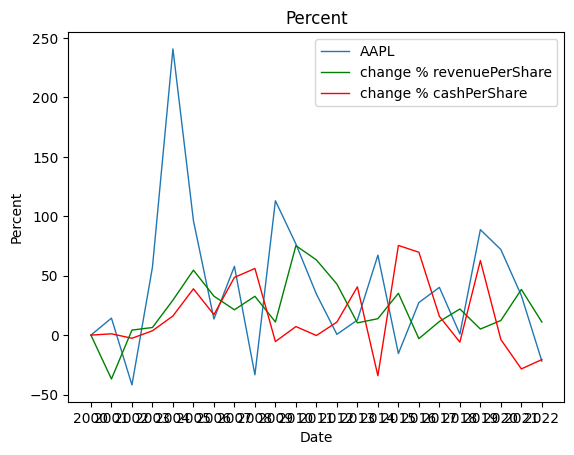

In [26]:
# Set the title and axis labels
plt.title('Percent')
plt.xlabel('Date')
plt.ylabel('Percent')

x = 'change % revenuePerShare'
y = 'change % cashPerShare'


# Plot close price and moving averages
plt.plot(df_with_changes[f'change % {ticker}'],lw=1, label=ticker)
plt.plot(df_with_changes[x],'g',lw=1, label=x)
plt.plot(df_with_changes[y],'r', lw=1, label=y)

# Add a legend to the axis
plt.legend()

plt.show()

In [27]:
	# change % netDebtToEBITDA	change % currentRatio

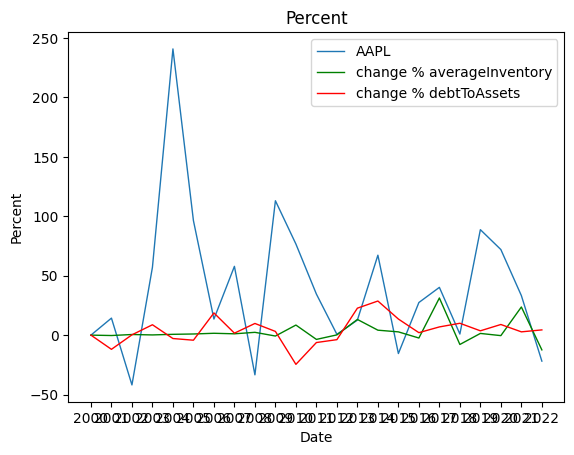

In [28]:
plt.title('Percent')
plt.xlabel('Date')
plt.ylabel('Percent')


z = 'change % averageInventory'
e = 'change % debtToAssets'

# Plot close price and moving averages
plt.plot(df_with_changes[f'change % {ticker}'],lw=1, label=ticker)
plt.plot(df_with_changes[z],'g',lw=1, label=z)
plt.plot(df_with_changes[e],'r', lw=1, label=e)

# Add a legend to the axis
plt.legend()

plt.show()

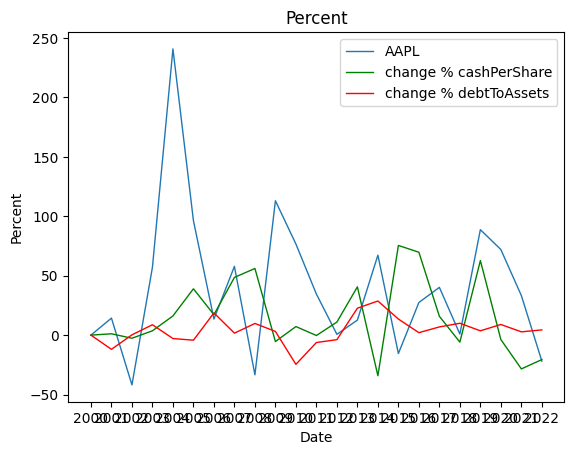

In [29]:
plt.title('Percent')
plt.xlabel('Date')
plt.ylabel('Percent')


z1 = 'change % cashPerShare'
e1 = 'change % debtToAssets'

# Plot close price and moving averages
plt.plot(df_with_changes[f'change % {ticker}'],lw=1, label=ticker)
plt.plot(df_with_changes[z1],'g',lw=1, label=z1)
plt.plot(df_with_changes[e1],'r', lw=1, label=e1)

# Add a legend to the axis
plt.legend()

plt.show()